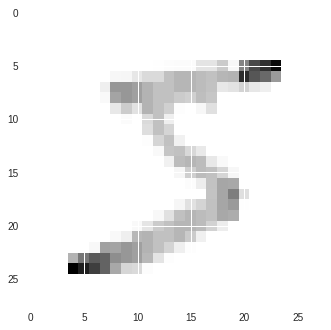

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize the image data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


plt.imshow(x_train[0])

In [30]:
# initialize the feed-forward neural network
model = tf.keras.models.Sequential()

# flatten model
model.add(tf.keras.layers.Flatten())

# add layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# output layer has n-classifications (10 digits)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# compile the model and fit it to training data with m-epochs (choose m=3)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2655 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1075 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0718 - acc: 0.9774


In [32]:
# display model loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0881 - acc: 0.9727
0.08808300906904042 0.9727


7


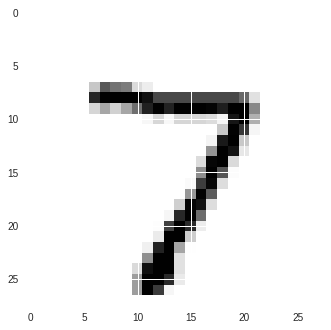

In [57]:
import numpy as np

# load the model predictions
predictions = model.predict([x_test])

# display an image and the model's prediction
plt.imshow(x_test[0])
print(np.argmax(predictions[0]))